In [1]:
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Defining Functions

In [3]:
def choose_centroids(X_train, k):
    random_rows = np.random.choice(X_train.shape[0], size = k, replace = False)
    return X_train[random_rows,:]

In [4]:
def dist(X_train,c_c):
    m = X_train.shape[0]
    d = []
    for i in range(m):
        dist = np.sqrt(np.sum((c_c - X_train[i])**2, axis=1))
        d.append(dist)
    return np.array(d)

In [5]:
def assign(X_train, c_c):
    d = dist(X_train,c_c)
    assigned = np.argmin(d, axis=1)
    return assigned

In [6]:
def mean_shift_c(assigned,X_train):
    new_c = []
    for k in range(np.unique(assigned).shape[0]):
        indices = np.where(assigned==k)[0]
        mean_pos = np.mean(X_train[indices],axis=0)
        new_c.append(mean_pos)
    return new_c

In [7]:
def kmeans(X_train,k,max_iters=100):
    c_c = choose_centroids(X_train,k)
    c = [c_c]
    for i in range(max_iters):
        assigned = assign(X_train, c_c)
        c_c = mean_shift_c(assigned,X_train)
        c.append(c_c)
        if (np.array(c[-1])==np.array(c[-2])).any():
            print(f"Number of iterations taken for the cluster centroids to reach the mean centres of {k} clusters:{i}")
            break
    return c_c,c

In [8]:
def plot(X_train,final_assign):
    style.use('ggplot')
    for k in range(np.unique(final_assign).shape[0]):
        indices = np.where(final_assign==k)[0]
        X = X_train[indices]
        plt.scatter(X[:,0],X[:,1])

In [9]:
def wcss(X_train,final_c,final_assign):
    wcss = 0
    for k in range(len(final_c)):
        indices = np.where(final_assign==k)[0]
        X = X_train[indices]
        wcss += np.sum((X - final_c[k])**2)
    return wcss

In [10]:
def elbow(X_train,max_k):
    w = []
    k = []
    for i in range(1,max_k+1):
        final_c,c = kmeans(X_train,i)
        final_assign = assign(X_train,final_c)
        w.append(wcss(X_train,final_c,final_assign))
        k.append(i)
    style.use('default')
    plt.plot(k,w)
    plt.xlabel('K')
    plt.ylabel('WCSS Cost')
    plt.title('Elbow Method')

# Loading Data  

In [11]:
X_train = pd.read_csv('Kmean_dataset.csv').to_numpy()
X_train.shape

(178, 13)

# Deciding the appropriate value of K using Elbow Method

Number of iterations taken for the cluster centroids to reach the mean centres of 1 clusters:1
Number of iterations taken for the cluster centroids to reach the mean centres of 2 clusters:8
Number of iterations taken for the cluster centroids to reach the mean centres of 3 clusters:2
Number of iterations taken for the cluster centroids to reach the mean centres of 4 clusters:3
Number of iterations taken for the cluster centroids to reach the mean centres of 5 clusters:3
Number of iterations taken for the cluster centroids to reach the mean centres of 6 clusters:2
Number of iterations taken for the cluster centroids to reach the mean centres of 7 clusters:1


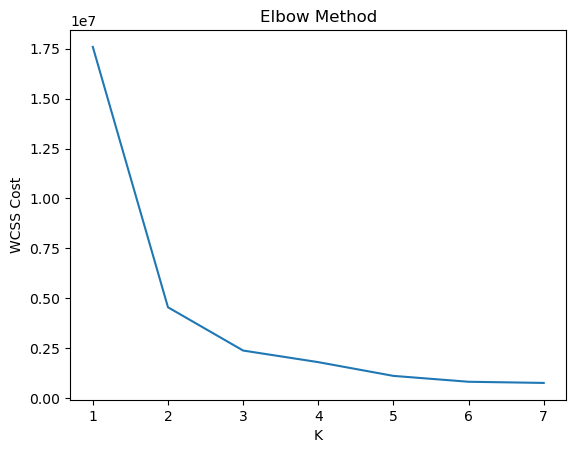

In [12]:
elbow(X_train,7)

# Running K-Means

In [13]:
final_c,c = kmeans(X_train,2,100)
print(f"Final coordinates of the cluster centroids:\n{final_c}")

Number of iterations taken for the cluster centroids to reach the mean centres of 2 clusters:7
Final coordinates of the cluster centroids:
[array([1.27065574e+01, 2.53360656e+00, 2.34024590e+00, 2.04237705e+01,
       9.66885246e+01, 2.06770492e+00, 1.64852459e+00, 3.93524590e-01,
       1.45663934e+00, 4.82385245e+00, 9.10737705e-01, 2.41155738e+00,
       5.63500000e+02]), array([1.36412500e+01, 1.90660714e+00, 2.42375000e+00, 1.74714286e+01,
       1.06392857e+02, 2.79053571e+00, 2.85875000e+00, 2.92857143e-01,
       1.88339286e+00, 5.56839286e+00, 1.05921429e+00, 3.04767857e+00,
       1.14642857e+03])]


In [14]:
c

[array([[1.242e+01, 4.430e+00, 2.730e+00, 2.650e+01, 1.020e+02, 2.200e+00,
         2.130e+00, 4.300e-01, 1.710e+00, 2.080e+00, 9.200e-01, 3.120e+00,
         3.650e+02],
        [1.307e+01, 1.500e+00, 2.100e+00, 1.550e+01, 9.800e+01, 2.400e+00,
         2.640e+00, 2.800e-01, 1.370e+00, 3.700e+00, 1.180e+00, 2.690e+00,
         1.020e+03]]),
 [array([1.25938776e+01, 2.45102041e+00, 2.32785714e+00, 2.06948980e+01,
         9.35612245e+01, 2.05836735e+00, 1.65071429e+00, 3.96020408e-01,
         1.42642857e+00, 4.60918366e+00, 9.14387755e-01, 2.39826531e+00,
         5.14132653e+02]),
  array([1.3498875e+01, 2.1958750e+00, 2.4138750e+00, 1.8025000e+01,
         1.0731250e+02, 2.5851250e+00, 2.4930000e+00, 3.2000000e-01,
         1.7923750e+00, 5.6080000e+00, 1.0102000e+00, 2.8731250e+00,
         1.0320250e+03])],
 [array([1.26498230e+01, 2.52920354e+00, 2.33097345e+00, 2.05159292e+01,
         9.54513274e+01, 2.05407080e+00, 1.62761062e+00, 3.96017699e-01,
         1.44495575e+00, 4.738

In [15]:
final_assign = assign(X_train,final_c)
ex = np.array(list(range(1,final_assign.shape[0]+1)))
df_t = pd.DataFrame({'Example No.':ex, 'Assigned Cluster Grp':final_assign})
df_t

,Example No.,Assigned Cluster Grp
0,1,1
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
173,174,0
174,175,0
175,176,0
176,177,0


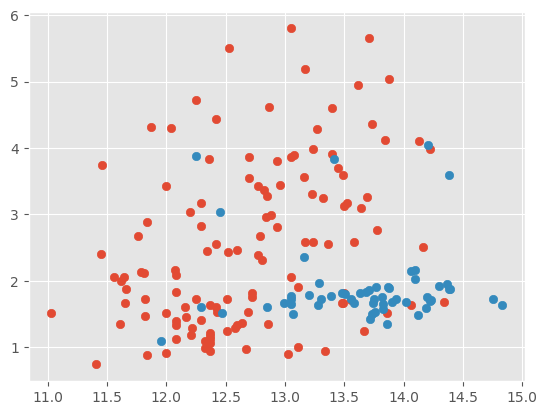

In [16]:
plot(X_train,final_assign)

In [17]:
df_t.to_csv('K-means_pred.csv')